# Tugas Besar Pembelajaran Mesin 2

#### Pustaka Terkait

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import datasets, metrics
import time
import random
import matplotlib.pyplot as plt

## 1.a. Create a Classifier 

#### Deskripsi Algoritma

Algoritma ini menghitung..

#### Source Code Program

In [2]:
class Network(object):
    def __init__(self, sizes):
        self.sizes = sizes
        self.num_layers = len(sizes)
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]]
        self.weights = [np.random.randn(y, x) for x,y in zip(sizes[:-1], sizes[1:])]
        self.history = d = {'acc': [], 'val_acc': [], 'loss': [], 'val_loss': []}
    
    def feed_forward(self, activation):
        for bias, weight in zip(self.biases, self.weights):
            activation = sigmoid(np.dot(weight, activation) + bias.transpose()[0])
        return activation
    
    def fit(self, training_data, epochs, mini_batch_size, learning_rate,
            momentum=0, validation_data=None, validation_split=0.0):
        if validation_split != 0.0 and not validation_data :
            training_data, validation_data = train_test_split(training_data, test_size=validation_split, random_state=42)
        n_training = len(training_data)
        if validation_data or validation_split != 0.0: 
            n_validation = len(validation_data)
            print("Train on {} samples, validate on {} samples".format(n_training, n_validation))
        for epoch in range(epochs):
            mini_batches = [training_data[k:k + mini_batch_size] for k in range(0, n_training, mini_batch_size)]
            previous_weights = self.weights
            previous_biases =self.biases
            first = True
            for mini_batch in mini_batches:
                if first: previous_weights, previous_biases = self.weights, self.biases
                start = time.time()
                previous_weights, previous_biases = self.update_mini_batch(mini_batch, 
                                                                           learning_rate,
                                                                           momentum, 
                                                                           previous_weights, 
                                                                           previous_biases)
                end = time.time() - start
            if validation_data or validation_split != 0:
                training_accuracy, training_loss = self.evaluate(mini_batches[0])
                validation_accuracy, validation_loss = self.evaluate(validation_data)
                self.history['acc'].append(training_accuracy)
                self.history['val_acc'].append(validation_accuracy)
                self.history['loss'].append(training_loss)
                self.history['val_loss'].append(validation_loss)
                print("Epoch {}/{} : {} s - loss: {} - acc: {} - val_loss: {} - val_acc: {}".format(epoch + 1, 
                                                                                                    epochs,
                                                                                                    end,
                                                                                                    training_loss,
                                                                                                    training_accuracy,
                                                                                                    validation_loss,
                                                                                                    validation_accuracy))
            else :
                print("Epoch {} complete.".format(epoch + 1))
        
    def update_mini_batch(self, mini_batch, learning_rate, momentum, previous_weights, previous_biases):
        nabla_biases = [np.zeros(bias.shape) for bias in self.biases]
        nabla_weights = [np.zeros(weight.shape) for weight in self.weights]
        for x, y in mini_batch:
            delta_nabla_bias, delta_nabla_weights = self.backpropagation(x, y)
            nabla_biases = [nb + dnb for nb, dnb in zip(nabla_biases, delta_nabla_bias)]
            nabla_weights = [nw + dnw for nw, dnw in zip(nabla_weights, delta_nabla_weights)]
        temp_weights = self.weights
        temp_biases = self.biases
        self.weights = [w + momentum * pw + (learning_rate/len(mini_batch)) * nw 
                        for w, nw, pw in zip(self.weights, nabla_weights, previous_weights)]
        self.biases = [b + momentum * pb + (learning_rate/len(mini_batch)) * nb 
                       for b, nb, pb in zip(self.biases, nabla_biases, previous_biases)]
        return (temp_weights, temp_biases)
        
    def backpropagation(self, x, y):
        nabla_bias = [np.zeros(bias.shape) for bias in self.biases]
        nabla_weights = [np.zeros(weight.shape) for weight in self.weights]
        
        activation = x
        activations = [x]
        z_vectors = []
        
        for bias, weight in zip(self.biases, self.weights):
            z = np.dot(weight, activation) + bias.transpose()[0]
            z_vectors.append(z)
            activation = sigmoid(z)
            activations.append(activation)
        
        delta = self.cost_derivative(activations[-1], y) * sigmoid_prime(z_vectors[-1])
        nabla_bias[-1] = delta
        delta_newaxis = delta[:, np.newaxis]
        m = len(activations[-2])
        activations_newaxis = activations[-2][:, np.newaxis].reshape(1, m)
        nabla_weights[-1] = np.dot(delta_newaxis, activations_newaxis)
        
        for layer in range(2, self.num_layers):
            z = z_vectors[-layer]
            sp = sigmoid_prime(z)
            delta = np.dot(self.weights[-layer+1].transpose(), delta) * sp
            nabla_bias[-layer] = delta
            delta_newaxis = delta[:, np.newaxis]
            m = len(activations[-layer-1].transpose())
            activations_newaxis = activations[-layer-1].transpose()[:, np.newaxis].reshape(1, m)
            nabla_weights[-layer] = np.dot(delta_newaxis, activations_newaxis)
        
        return (nabla_bias, nabla_weights)
    
    def evaluate(self, test_data):
        test_results = [(1 if self.feed_forward(x) * 2 >= 1 else 0, y) for x, y in test_data]
        accuracy = sum(int(x == y) for x, y in test_results)/len(test_results)
        loss = sum(pow(int(y - x), 2) for x, y in test_results)/len(test_results)
        return accuracy, loss
    
    def predict(self, test_data):
        test_results = [1 if self.feed_forward(x) * 2 >= 1 else 0 for x, y in test_data]
        return (test_results)
    
    def cost_derivative(self, output_activations, y):
        return np.squeeze(y - output_activations)

def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))

def sigmoid_prime(z):
    return sigmoid(z)*(1-sigmoid(z))

#### Percobaan pada Iris

In [3]:
iris = datasets.load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, random_state=42)

In [4]:
train_data = [(x, y) for x, y in zip(X_train, y_train)]
test_data = [(x, y) for x, y in zip(X_test, y_test)]

In [5]:
neural_network = Network([4, 1, 10, 1])
neural_network.fit(train_data, 200, 1, 0.1, momentum=0.0001, validation_split=0.1)

Train on 121 samples, validate on 14 samples
Epoch 1/200 : 8.845329284667969e-05 s - loss: 0.0 - acc: 1.0 - val_loss: 1.6428571428571428 - val_acc: 0.21428571428571427
Epoch 2/200 : 8.893013000488281e-05 s - loss: 1.0 - acc: 0.0 - val_loss: 0.5 - val_acc: 0.5
Epoch 3/200 : 8.726119995117188e-05 s - loss: 1.0 - acc: 0.0 - val_loss: 0.5 - val_acc: 0.5
Epoch 4/200 : 8.893013000488281e-05 s - loss: 1.0 - acc: 0.0 - val_loss: 0.5 - val_acc: 0.5
Epoch 5/200 : 8.726119995117188e-05 s - loss: 1.0 - acc: 0.0 - val_loss: 0.5 - val_acc: 0.5
Epoch 6/200 : 8.559226989746094e-05 s - loss: 1.0 - acc: 0.0 - val_loss: 0.5 - val_acc: 0.5
Epoch 7/200 : 8.606910705566406e-05 s - loss: 1.0 - acc: 0.0 - val_loss: 0.5 - val_acc: 0.5
Epoch 8/200 : 8.535385131835938e-05 s - loss: 1.0 - acc: 0.0 - val_loss: 0.5 - val_acc: 0.5
Epoch 9/200 : 8.630752563476562e-05 s - loss: 1.0 - acc: 0.0 - val_loss: 0.5 - val_acc: 0.5
Epoch 10/200 : 8.726119995117188e-05 s - loss: 1.0 - acc: 0.0 - val_loss: 0.5 - val_acc: 0.5
Epo

Epoch 88/200 : 9.012222290039062e-05 s - loss: 1.0 - acc: 0.0 - val_loss: 0.5 - val_acc: 0.5
Epoch 89/200 : 9.059906005859375e-05 s - loss: 1.0 - acc: 0.0 - val_loss: 0.5 - val_acc: 0.5
Epoch 90/200 : 9.131431579589844e-05 s - loss: 1.0 - acc: 0.0 - val_loss: 0.5 - val_acc: 0.5
Epoch 91/200 : 9.083747863769531e-05 s - loss: 1.0 - acc: 0.0 - val_loss: 0.5 - val_acc: 0.5
Epoch 92/200 : 9.036064147949219e-05 s - loss: 1.0 - acc: 0.0 - val_loss: 0.5 - val_acc: 0.5
Epoch 93/200 : 0.00019598007202148438 s - loss: 1.0 - acc: 0.0 - val_loss: 0.5 - val_acc: 0.5
Epoch 94/200 : 9.870529174804688e-05 s - loss: 1.0 - acc: 0.0 - val_loss: 0.5 - val_acc: 0.5
Epoch 95/200 : 0.0001537799835205078 s - loss: 1.0 - acc: 0.0 - val_loss: 0.5 - val_acc: 0.5
Epoch 96/200 : 9.059906005859375e-05 s - loss: 1.0 - acc: 0.0 - val_loss: 0.5 - val_acc: 0.5
Epoch 97/200 : 9.059906005859375e-05 s - loss: 1.0 - acc: 0.0 - val_loss: 0.5 - val_acc: 0.5
Epoch 98/200 : 9.036064147949219e-05 s - loss: 1.0 - acc: 0.0 - val_l

Epoch 181/200 : 9.131431579589844e-05 s - loss: 1.0 - acc: 0.0 - val_loss: 0.5 - val_acc: 0.5
Epoch 182/200 : 0.0001163482666015625 s - loss: 1.0 - acc: 0.0 - val_loss: 0.5 - val_acc: 0.5
Epoch 183/200 : 9.322166442871094e-05 s - loss: 1.0 - acc: 0.0 - val_loss: 0.5 - val_acc: 0.5
Epoch 184/200 : 9.012222290039062e-05 s - loss: 1.0 - acc: 0.0 - val_loss: 0.5 - val_acc: 0.5
Epoch 185/200 : 9.1552734375e-05 s - loss: 1.0 - acc: 0.0 - val_loss: 0.5 - val_acc: 0.5
Epoch 186/200 : 9.799003601074219e-05 s - loss: 1.0 - acc: 0.0 - val_loss: 0.5 - val_acc: 0.5
Epoch 187/200 : 9.036064147949219e-05 s - loss: 1.0 - acc: 0.0 - val_loss: 0.5 - val_acc: 0.5
Epoch 188/200 : 9.608268737792969e-05 s - loss: 1.0 - acc: 0.0 - val_loss: 0.5 - val_acc: 0.5
Epoch 189/200 : 9.822845458984375e-05 s - loss: 1.0 - acc: 0.0 - val_loss: 0.5 - val_acc: 0.5
Epoch 190/200 : 0.00012087821960449219 s - loss: 1.0 - acc: 0.0 - val_loss: 0.5 - val_acc: 0.5
Epoch 191/200 : 0.00016069412231445312 s - loss: 1.0 - acc: 0.0 

In [6]:
accuracy, loss = neural_network.evaluate(test_data)

In [7]:
print("Loss: {} %".format(accuracy*100.0))
print("Accuracy {} %".format(loss*100.0))

Loss: 40.0 %
Accuracy 60.0 %


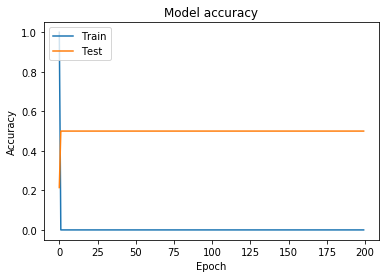

In [8]:
plt.plot(neural_network.history['acc'])
plt.plot(neural_network.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

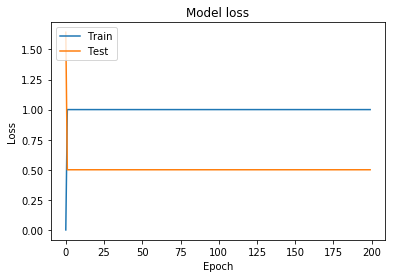

In [9]:
plt.plot(neural_network.history['loss'])
plt.plot(neural_network.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## 1.b. Explorasi Keras 

#### Deskripsi Algoritma

Pembelajaran akan menggunakan kakas keras dengan model <i>sequential</i> dan lapisan <i>dense</i> .Model akan memakai input layer sebanyak 1 neuron dengan bentuk input 4 sesuai jumlah attribute data latih, kemudian dengan 3 hidden layer masing-masing 2 neuron kemudian 3 neuron, dan 4 neuron dan 1 output layer dengan 1 neuron. Optimizer yang dipakai adalah Adam (Adaptive Moment Estimation), dengan perhitungan loss dengan Mean Squared Error, dan Metrics Accuracy. 

#### Source Code Program

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Activation

Using TensorFlow backend.


In [11]:
network = Sequential()
network.add(Dense(4, activation='sigmoid', input_shape=(4,)))
network.add(Dense(1, activation='sigmoid'))
network.add(Dense(10, activation='sigmoid'))
network.add(Dense(1, activation='sigmoid'))

In [12]:
network.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [13]:
network.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 56
Trainable params: 56
Non-trainable params: 0
_________________________________________________________________


#### Percobaan pada Iris

In [14]:
history = network.fit(X_train, y_train, epochs=200, verbose=1, batch_size=1, validation_split=0.1)

Train on 121 samples, validate on 14 samples
Epoch 1/200
121/121 [==============================] - 0s 2ms/step - loss: 0.8542 - acc: 0.3223 - val_loss: 1.0613 - val_acc: 0.3571
Epoch 2/200
121/121 [==============================] - 0s 823us/step - loss: 0.7856 - acc: 0.3223 - val_loss: 0.9569 - val_acc: 0.3571
Epoch 3/200
121/121 [==============================] - 0s 947us/step - loss: 0.7461 - acc: 0.3223 - val_loss: 0.8879 - val_acc: 0.3571
Epoch 4/200
121/121 [==============================] - 0s 951us/step - loss: 0.7234 - acc: 0.3223 - val_loss: 0.8397 - val_acc: 0.3571
Epoch 5/200
121/121 [==============================] - 0s 933us/step - loss: 0.7089 - acc: 0.3223 - val_loss: 0.8086 - val_acc: 0.3571
Epoch 6/200
121/121 [==============================] - 0s 839us/step - loss: 0.6987 - acc: 0.3223 - val_loss: 0.7863 - val_acc: 0.3571
Epoch 7/200
121/121 [==============================] - 0s 833us/step - loss: 0.6902 - acc: 0.3223 - val_loss: 0.7654 - val_acc: 0.3571
Epoch 8/200


121/121 [==============================] - 0s 804us/step - loss: 0.3402 - acc: 0.6694 - val_loss: 0.5098 - val_acc: 0.5000
Epoch 62/200
121/121 [==============================] - 0s 810us/step - loss: 0.3395 - acc: 0.6694 - val_loss: 0.5090 - val_acc: 0.5000
Epoch 63/200
121/121 [==============================] - 0s 802us/step - loss: 0.3388 - acc: 0.6694 - val_loss: 0.5083 - val_acc: 0.5000
Epoch 64/200
121/121 [==============================] - 0s 842us/step - loss: 0.3381 - acc: 0.6694 - val_loss: 0.5078 - val_acc: 0.5000
Epoch 65/200
121/121 [==============================] - 0s 846us/step - loss: 0.3376 - acc: 0.6694 - val_loss: 0.5072 - val_acc: 0.5000
Epoch 66/200
121/121 [==============================] - 0s 848us/step - loss: 0.3370 - acc: 0.6694 - val_loss: 0.5066 - val_acc: 0.5000
Epoch 67/200
121/121 [==============================] - 0s 905us/step - loss: 0.3366 - acc: 0.6694 - val_loss: 0.5061 - val_acc: 0.5000
Epoch 68/200
121/121 [==============================] - 0s 87

121/121 [==============================] - 0s 795us/step - loss: 0.3307 - acc: 0.6694 - val_loss: 0.5002 - val_acc: 0.5000
Epoch 122/200
121/121 [==============================] - 0s 874us/step - loss: 0.3307 - acc: 0.6694 - val_loss: 0.5002 - val_acc: 0.5000
Epoch 123/200
121/121 [==============================] - 0s 852us/step - loss: 0.3307 - acc: 0.6694 - val_loss: 0.5001 - val_acc: 0.5000
Epoch 124/200
121/121 [==============================] - 0s 837us/step - loss: 0.3307 - acc: 0.6694 - val_loss: 0.5001 - val_acc: 0.5000
Epoch 125/200
121/121 [==============================] - 0s 853us/step - loss: 0.3307 - acc: 0.6694 - val_loss: 0.5001 - val_acc: 0.5000
Epoch 126/200
121/121 [==============================] - 0s 852us/step - loss: 0.3307 - acc: 0.6694 - val_loss: 0.5001 - val_acc: 0.5000
Epoch 127/200
121/121 [==============================] - 0s 817us/step - loss: 0.3307 - acc: 0.6694 - val_loss: 0.5001 - val_acc: 0.5000
Epoch 128/200
121/121 [==============================] 

Epoch 181/200
121/121 [==============================] - 0s 822us/step - loss: 0.3306 - acc: 0.6694 - val_loss: 0.5000 - val_acc: 0.5000
Epoch 182/200
121/121 [==============================] - 0s 864us/step - loss: 0.3306 - acc: 0.6694 - val_loss: 0.5000 - val_acc: 0.5000
Epoch 183/200
121/121 [==============================] - 0s 834us/step - loss: 0.3306 - acc: 0.6694 - val_loss: 0.5000 - val_acc: 0.5000
Epoch 184/200
121/121 [==============================] - 0s 851us/step - loss: 0.3306 - acc: 0.6694 - val_loss: 0.5000 - val_acc: 0.5000
Epoch 185/200
121/121 [==============================] - 0s 907us/step - loss: 0.3306 - acc: 0.6694 - val_loss: 0.5000 - val_acc: 0.5000
Epoch 186/200
121/121 [==============================] - 0s 833us/step - loss: 0.3306 - acc: 0.6694 - val_loss: 0.5000 - val_acc: 0.5000
Epoch 187/200
121/121 [==============================] - 0s 831us/step - loss: 0.3306 - acc: 0.6694 - val_loss: 0.5000 - val_acc: 0.5000
Epoch 188/200
121/121 [==================

In [15]:
score = network.evaluate(X_test, y_test, batch_size=1)

15/15 [==============================] - 0s 373us/step


In [16]:
print("Loss: {} %".format(score[0]*100.0))
print("Accuracy {} %".format(score[1]*100.0))

Loss: 20.00008637411933 %
Accuracy 80.0 %


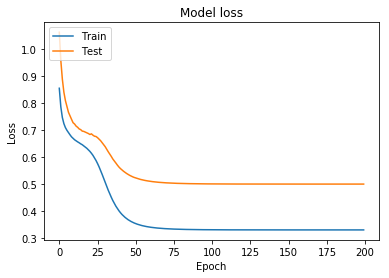

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

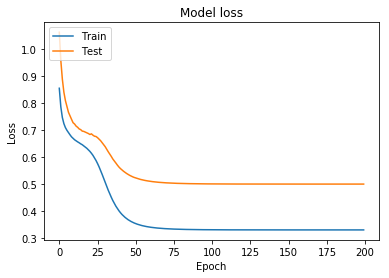

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Eksperimen Data Categorization Framework

#### Persiapan Data

Hal pertama yang kami lakukan adalah menggunakan data latih Weather Categorization dari WEKA. 

In [19]:
weather_df = pd.read_csv('dataset/weather.csv')

weather_df

,outlook,temperature,humidity,windy,play
0,sunny,85,85,False,no
1,sunny,80,90,True,no
2,overcast,83,86,False,yes
3,rainy,70,96,False,yes
4,rainy,68,80,False,yes
5,rainy,65,70,True,no
6,overcast,64,65,True,yes
7,sunny,72,95,False,no
8,sunny,69,70,False,yes
9,rainy,75,80,False,yes


Dapat dilihat data latih terdiri dari data numerik dan data kategorikal. Diperlukan preprocessing dengan kakas scikit-learn yaitu LabelEncoder sebagai berikut.

In [20]:
label_encoder = LabelEncoder()
weather_df['outlook'] = label_encoder.fit_transform(weather_df.outlook)
weather_df['windy'] = label_encoder.fit_transform(weather_df.windy)
weather_df['play'] = label_encoder.fit_transform(weather_df.play)

In [21]:
weather_df

,outlook,temperature,humidity,windy,play
0,2,85,85,0,0
1,2,80,90,1,0
2,0,83,86,0,1
3,1,70,96,0,1
4,1,68,80,0,1
5,1,65,70,1,0
6,0,64,65,1,1
7,2,72,95,0,0
8,2,69,70,0,1
9,1,75,80,0,1


In [22]:
X_weather = weather_df.iloc[:,:4].values
X_weather

array([[ 2, 85, 85,  0],
       [ 2, 80, 90,  1],
       [ 0, 83, 86,  0],
       [ 1, 70, 96,  0],
       [ 1, 68, 80,  0],
       [ 1, 65, 70,  1],
       [ 0, 64, 65,  1],
       [ 2, 72, 95,  0],
       [ 2, 69, 70,  0],
       [ 1, 75, 80,  0],
       [ 2, 75, 70,  1],
       [ 0, 72, 90,  1],
       [ 0, 81, 75,  0],
       [ 1, 71, 91,  1]])

In [23]:
y_weather = weather_df.play.values
y_weather

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])

Kemudian, setelah kami menjadikan data latih tersebut numerik, kami melakukan pemisahan sebagian data latih (10%) menjadi data uji dengan proporsi.

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_weather, y_weather, test_size=0.1,shuffle=False)

In [25]:
X_train

array([[ 2, 85, 85,  0],
       [ 2, 80, 90,  1],
       [ 0, 83, 86,  0],
       [ 1, 70, 96,  0],
       [ 1, 68, 80,  0],
       [ 1, 65, 70,  1],
       [ 0, 64, 65,  1],
       [ 2, 72, 95,  0],
       [ 2, 69, 70,  0],
       [ 1, 75, 80,  0],
       [ 2, 75, 70,  1],
       [ 0, 72, 90,  1]])

In [26]:
X_test

array([[ 0, 81, 75,  0],
       [ 1, 71, 91,  1]])

In [27]:
y_train

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1])

In [28]:
y_test

array([1, 0])

In [29]:
train_data = [(x, y) for x, y in zip(X_train, y_train)]
test_data = [(x, y) for x, y in zip(X_test, y_test)]

<b> Batch = 1 </b>

##### Classifier Sendiri

In [30]:
start = time.time()

In [31]:
neural_network1 = Network([4, 3, 5, 10, 1])
neural_network1.fit(train_data, 500, 1, 0.1, validation_split=0.1)

Train on 10 samples, validate on 2 samples
Epoch 1/500 : 0.00015592575073242188 s - loss: 0.0 - acc: 1.0 - val_loss: 1.0 - val_acc: 0.0
Epoch 2/500 : 0.00015687942504882812 s - loss: 0.0 - acc: 1.0 - val_loss: 1.0 - val_acc: 0.0
Epoch 3/500 : 0.00015592575073242188 s - loss: 1.0 - acc: 0.0 - val_loss: 0.0 - val_acc: 1.0
Epoch 4/500 : 0.00015616416931152344 s - loss: 1.0 - acc: 0.0 - val_loss: 0.0 - val_acc: 1.0
Epoch 5/500 : 0.0001373291015625 s - loss: 1.0 - acc: 0.0 - val_loss: 0.0 - val_acc: 1.0
Epoch 6/500 : 0.0001628398895263672 s - loss: 1.0 - acc: 0.0 - val_loss: 0.0 - val_acc: 1.0
Epoch 7/500 : 0.00015616416931152344 s - loss: 1.0 - acc: 0.0 - val_loss: 0.0 - val_acc: 1.0
Epoch 8/500 : 0.00015664100646972656 s - loss: 1.0 - acc: 0.0 - val_loss: 0.0 - val_acc: 1.0
Epoch 9/500 : 0.00015544891357421875 s - loss: 1.0 - acc: 0.0 - val_loss: 0.0 - val_acc: 1.0
Epoch 10/500 : 0.00015544891357421875 s - loss: 1.0 - acc: 0.0 - val_loss: 0.0 - val_acc: 1.0
Epoch 11/500 : 0.00015592575073

Epoch 98/500 : 0.0002701282501220703 s - loss: 1.0 - acc: 0.0 - val_loss: 0.0 - val_acc: 1.0
Epoch 99/500 : 0.00028014183044433594 s - loss: 1.0 - acc: 0.0 - val_loss: 0.0 - val_acc: 1.0
Epoch 100/500 : 0.0002701282501220703 s - loss: 1.0 - acc: 0.0 - val_loss: 0.0 - val_acc: 1.0
Epoch 101/500 : 0.0002696514129638672 s - loss: 1.0 - acc: 0.0 - val_loss: 0.0 - val_acc: 1.0
Epoch 102/500 : 0.00022077560424804688 s - loss: 1.0 - acc: 0.0 - val_loss: 0.0 - val_acc: 1.0
Epoch 103/500 : 0.0001423358917236328 s - loss: 1.0 - acc: 0.0 - val_loss: 0.0 - val_acc: 1.0
Epoch 104/500 : 0.00014090538024902344 s - loss: 1.0 - acc: 0.0 - val_loss: 0.0 - val_acc: 1.0
Epoch 105/500 : 0.00013875961303710938 s - loss: 1.0 - acc: 0.0 - val_loss: 0.0 - val_acc: 1.0
Epoch 106/500 : 0.00013828277587890625 s - loss: 1.0 - acc: 0.0 - val_loss: 0.0 - val_acc: 1.0
Epoch 107/500 : 0.00014209747314453125 s - loss: 1.0 - acc: 0.0 - val_loss: 0.0 - val_acc: 1.0
Epoch 108/500 : 0.00013685226440429688 s - loss: 1.0 - a

Epoch 191/500 : 0.00014066696166992188 s - loss: 1.0 - acc: 0.0 - val_loss: 0.0 - val_acc: 1.0
Epoch 192/500 : 0.0001385211944580078 s - loss: 1.0 - acc: 0.0 - val_loss: 0.0 - val_acc: 1.0
Epoch 193/500 : 0.0002810955047607422 s - loss: 1.0 - acc: 0.0 - val_loss: 0.0 - val_acc: 1.0
Epoch 194/500 : 0.0002799034118652344 s - loss: 1.0 - acc: 0.0 - val_loss: 0.0 - val_acc: 1.0
Epoch 195/500 : 0.0002732276916503906 s - loss: 1.0 - acc: 0.0 - val_loss: 0.0 - val_acc: 1.0
Epoch 196/500 : 0.0002720355987548828 s - loss: 1.0 - acc: 0.0 - val_loss: 0.0 - val_acc: 1.0
Epoch 197/500 : 0.0002715587615966797 s - loss: 1.0 - acc: 0.0 - val_loss: 0.0 - val_acc: 1.0
Epoch 198/500 : 0.00013780593872070312 s - loss: 1.0 - acc: 0.0 - val_loss: 0.0 - val_acc: 1.0
Epoch 199/500 : 0.0001595020294189453 s - loss: 1.0 - acc: 0.0 - val_loss: 0.0 - val_acc: 1.0
Epoch 200/500 : 0.00015664100646972656 s - loss: 1.0 - acc: 0.0 - val_loss: 0.0 - val_acc: 1.0
Epoch 201/500 : 0.00016045570373535156 s - loss: 1.0 - ac

Epoch 286/500 : 0.00016188621520996094 s - loss: 1.0 - acc: 0.0 - val_loss: 0.0 - val_acc: 1.0
Epoch 287/500 : 0.00016236305236816406 s - loss: 1.0 - acc: 0.0 - val_loss: 0.0 - val_acc: 1.0
Epoch 288/500 : 0.000156402587890625 s - loss: 1.0 - acc: 0.0 - val_loss: 0.0 - val_acc: 1.0
Epoch 289/500 : 0.00015783309936523438 s - loss: 1.0 - acc: 0.0 - val_loss: 0.0 - val_acc: 1.0
Epoch 290/500 : 0.0001571178436279297 s - loss: 1.0 - acc: 0.0 - val_loss: 0.0 - val_acc: 1.0
Epoch 291/500 : 0.0004544258117675781 s - loss: 1.0 - acc: 0.0 - val_loss: 0.0 - val_acc: 1.0
Epoch 292/500 : 0.00015926361083984375 s - loss: 1.0 - acc: 0.0 - val_loss: 0.0 - val_acc: 1.0
Epoch 293/500 : 0.00016117095947265625 s - loss: 1.0 - acc: 0.0 - val_loss: 0.0 - val_acc: 1.0
Epoch 294/500 : 0.00015616416931152344 s - loss: 1.0 - acc: 0.0 - val_loss: 0.0 - val_acc: 1.0
Epoch 295/500 : 0.0001571178436279297 s - loss: 1.0 - acc: 0.0 - val_loss: 0.0 - val_acc: 1.0
Epoch 296/500 : 0.00015664100646972656 s - loss: 1.0 - 

Epoch 391/500 : 0.00015926361083984375 s - loss: 1.0 - acc: 0.0 - val_loss: 0.0 - val_acc: 1.0
Epoch 392/500 : 0.00015783309936523438 s - loss: 1.0 - acc: 0.0 - val_loss: 0.0 - val_acc: 1.0
Epoch 393/500 : 0.000156402587890625 s - loss: 1.0 - acc: 0.0 - val_loss: 0.0 - val_acc: 1.0
Epoch 394/500 : 0.0001571178436279297 s - loss: 1.0 - acc: 0.0 - val_loss: 0.0 - val_acc: 1.0
Epoch 395/500 : 0.0001583099365234375 s - loss: 1.0 - acc: 0.0 - val_loss: 0.0 - val_acc: 1.0
Epoch 396/500 : 0.0001628398895263672 s - loss: 1.0 - acc: 0.0 - val_loss: 0.0 - val_acc: 1.0
Epoch 397/500 : 0.00015783309936523438 s - loss: 1.0 - acc: 0.0 - val_loss: 0.0 - val_acc: 1.0
Epoch 398/500 : 0.0001575946807861328 s - loss: 1.0 - acc: 0.0 - val_loss: 0.0 - val_acc: 1.0
Epoch 399/500 : 0.00015974044799804688 s - loss: 1.0 - acc: 0.0 - val_loss: 0.0 - val_acc: 1.0
Epoch 400/500 : 0.00015783309936523438 s - loss: 1.0 - acc: 0.0 - val_loss: 0.0 - val_acc: 1.0
Epoch 401/500 : 0.0001652240753173828 s - loss: 1.0 - ac

Epoch 496/500 : 0.00027441978454589844 s - loss: 1.0 - acc: 0.0 - val_loss: 0.0 - val_acc: 1.0
Epoch 497/500 : 0.0002703666687011719 s - loss: 1.0 - acc: 0.0 - val_loss: 0.0 - val_acc: 1.0
Epoch 498/500 : 0.0002732276916503906 s - loss: 1.0 - acc: 0.0 - val_loss: 0.0 - val_acc: 1.0
Epoch 499/500 : 0.00028967857360839844 s - loss: 1.0 - acc: 0.0 - val_loss: 0.0 - val_acc: 1.0
Epoch 500/500 : 0.00028705596923828125 s - loss: 1.0 - acc: 0.0 - val_loss: 0.0 - val_acc: 1.0


In [32]:
end = time.time() - start

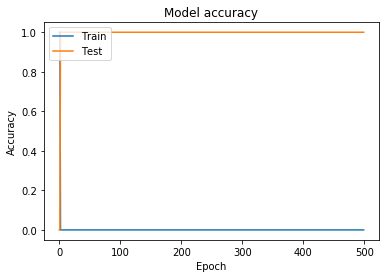

In [33]:
plt.plot(neural_network1.history['acc'])
plt.plot(neural_network1.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

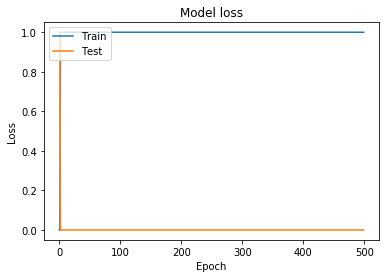

In [34]:
plt.plot(neural_network1.history['loss'])
plt.plot(neural_network1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
accuracy1, loss1 = neural_network1.evaluate(test_data)

In [61]:
print("Loss: {} %".format(loss1*100.0))
print("Accuracy {} %".format(accuracy1*100.0))
print("Time: {} ms".format(end))

Loss: 50.0 %
Accuracy 50.0 %
Time: 2.0775177478790283 ms


##### Keras Model

Reinitialisasi model keras untuk eksperimen pertama.

In [36]:
network1 = Sequential([
    Dense(4, input_shape=(4,)),
    Dense(3, activation='sigmoid'),
    Dense(5, activation='sigmoid'),
    Dense(10, activation='sigmoid'),
    Dense(1, activation='sigmoid')
])

In [37]:
network1.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [38]:
network1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 15        
_________________________________________________________________
dense_7 (Dense)              (None, 5)                 20        
_________________________________________________________________
dense_8 (Dense)              (None, 10)                60        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 11        
Total params: 126
Trainable params: 126
Non-trainable params: 0
_________________________________________________________________


In [39]:
start = time.time()

In [40]:
history1 = network1.fit(X_train, y_train, epochs=500, verbose=1, batch_size=1, validation_split=0.1)

Train on 10 samples, validate on 2 samples
Epoch 1/500
10/10 [==============================] - 0s 29ms/step - loss: 0.2434 - acc: 0.6000 - val_loss: 0.1215 - val_acc: 1.0000
Epoch 2/500
10/10 [==============================] - 0s 1ms/step - loss: 0.2431 - acc: 0.6000 - val_loss: 0.1210 - val_acc: 1.0000
Epoch 3/500
10/10 [==============================] - 0s 1ms/step - loss: 0.2429 - acc: 0.6000 - val_loss: 0.1238 - val_acc: 1.0000
Epoch 4/500
10/10 [==============================] - 0s 1ms/step - loss: 0.2430 - acc: 0.6000 - val_loss: 0.1265 - val_acc: 1.0000
Epoch 5/500
10/10 [==============================] - 0s 1ms/step - loss: 0.2423 - acc: 0.6000 - val_loss: 0.1256 - val_acc: 1.0000
Epoch 6/500
10/10 [==============================] - 0s 1ms/step - loss: 0.2420 - acc: 0.6000 - val_loss: 0.1271 - val_acc: 1.0000
Epoch 7/500
10/10 [==============================] - 0s 1ms/step - loss: 0.2419 - acc: 0.6000 - val_loss: 0.1278 - val_acc: 1.0000
Epoch 8/500
10/10 [====================

10/10 [==============================] - 0s 1ms/step - loss: 0.2399 - acc: 0.6000 - val_loss: 0.1569 - val_acc: 1.0000
Epoch 63/500
10/10 [==============================] - 0s 1ms/step - loss: 0.2399 - acc: 0.6000 - val_loss: 0.1569 - val_acc: 1.0000
Epoch 64/500
10/10 [==============================] - 0s 1ms/step - loss: 0.2397 - acc: 0.6000 - val_loss: 0.1559 - val_acc: 1.0000
Epoch 65/500
10/10 [==============================] - 0s 1ms/step - loss: 0.2399 - acc: 0.6000 - val_loss: 0.1551 - val_acc: 1.0000
Epoch 66/500
10/10 [==============================] - 0s 877us/step - loss: 0.2396 - acc: 0.6000 - val_loss: 0.1552 - val_acc: 1.0000
Epoch 67/500
10/10 [==============================] - 0s 1ms/step - loss: 0.2393 - acc: 0.6000 - val_loss: 0.1560 - val_acc: 1.0000
Epoch 68/500
10/10 [==============================] - 0s 1ms/step - loss: 0.2394 - acc: 0.6000 - val_loss: 0.1562 - val_acc: 1.0000
Epoch 69/500
10/10 [==============================] - 0s 1ms/step - loss: 0.2391 - acc:

Epoch 124/500
10/10 [==============================] - 0s 1ms/step - loss: 0.2394 - acc: 0.6000 - val_loss: 0.1635 - val_acc: 1.0000
Epoch 125/500
10/10 [==============================] - 0s 1ms/step - loss: 0.2379 - acc: 0.6000 - val_loss: 0.1617 - val_acc: 1.0000
Epoch 126/500
10/10 [==============================] - 0s 1ms/step - loss: 0.2382 - acc: 0.6000 - val_loss: 0.1598 - val_acc: 1.0000
Epoch 127/500
10/10 [==============================] - 0s 1ms/step - loss: 0.2378 - acc: 0.6000 - val_loss: 0.1612 - val_acc: 1.0000
Epoch 128/500
10/10 [==============================] - 0s 1ms/step - loss: 0.2380 - acc: 0.6000 - val_loss: 0.1605 - val_acc: 1.0000
Epoch 129/500
10/10 [==============================] - 0s 1ms/step - loss: 0.2379 - acc: 0.6000 - val_loss: 0.1624 - val_acc: 1.0000
Epoch 130/500
10/10 [==============================] - 0s 1ms/step - loss: 0.2381 - acc: 0.6000 - val_loss: 0.1611 - val_acc: 1.0000
Epoch 131/500
10/10 [==============================] - 0s 1ms/step - 

10/10 [==============================] - 0s 1ms/step - loss: 0.2356 - acc: 0.6000 - val_loss: 0.1621 - val_acc: 1.0000
Epoch 186/500
10/10 [==============================] - 0s 1ms/step - loss: 0.2356 - acc: 0.6000 - val_loss: 0.1603 - val_acc: 1.0000
Epoch 187/500
10/10 [==============================] - 0s 1ms/step - loss: 0.2355 - acc: 0.6000 - val_loss: 0.1651 - val_acc: 1.0000
Epoch 188/500
10/10 [==============================] - 0s 1ms/step - loss: 0.2356 - acc: 0.6000 - val_loss: 0.1641 - val_acc: 1.0000
Epoch 189/500
10/10 [==============================] - 0s 932us/step - loss: 0.2354 - acc: 0.6000 - val_loss: 0.1623 - val_acc: 1.0000
Epoch 190/500
10/10 [==============================] - 0s 1ms/step - loss: 0.2358 - acc: 0.6000 - val_loss: 0.1614 - val_acc: 1.0000
Epoch 191/500
10/10 [==============================] - 0s 1ms/step - loss: 0.2364 - acc: 0.6000 - val_loss: 0.1675 - val_acc: 1.0000
Epoch 192/500
10/10 [==============================] - 0s 1ms/step - loss: 0.2356

10/10 [==============================] - 0s 953us/step - loss: 0.2295 - acc: 0.6000 - val_loss: 0.1609 - val_acc: 1.0000
Epoch 247/500
10/10 [==============================] - 0s 1ms/step - loss: 0.2272 - acc: 0.6000 - val_loss: 0.1629 - val_acc: 1.0000
Epoch 248/500
10/10 [==============================] - 0s 1ms/step - loss: 0.2288 - acc: 0.6000 - val_loss: 0.1633 - val_acc: 1.0000
Epoch 249/500
10/10 [==============================] - 0s 972us/step - loss: 0.2287 - acc: 0.6000 - val_loss: 0.1621 - val_acc: 1.0000
Epoch 250/500
10/10 [==============================] - 0s 2ms/step - loss: 0.2273 - acc: 0.6000 - val_loss: 0.1637 - val_acc: 1.0000
Epoch 251/500
10/10 [==============================] - 0s 1ms/step - loss: 0.2284 - acc: 0.6000 - val_loss: 0.1624 - val_acc: 1.0000
Epoch 252/500
10/10 [==============================] - 0s 1ms/step - loss: 0.2270 - acc: 0.6000 - val_loss: 0.1649 - val_acc: 1.0000
Epoch 253/500
10/10 [==============================] - 0s 1ms/step - loss: 0.22

10/10 [==============================] - 0s 1ms/step - loss: 0.2126 - acc: 0.6000 - val_loss: 0.1681 - val_acc: 1.0000
Epoch 308/500
10/10 [==============================] - 0s 1ms/step - loss: 0.2167 - acc: 0.6000 - val_loss: 0.1660 - val_acc: 1.0000
Epoch 309/500
10/10 [==============================] - 0s 2ms/step - loss: 0.2115 - acc: 0.6000 - val_loss: 0.1701 - val_acc: 1.0000
Epoch 310/500
10/10 [==============================] - 0s 900us/step - loss: 0.2135 - acc: 0.6000 - val_loss: 0.1707 - val_acc: 1.0000
Epoch 311/500
10/10 [==============================] - 0s 1ms/step - loss: 0.2119 - acc: 0.6000 - val_loss: 0.1683 - val_acc: 1.0000
Epoch 312/500
10/10 [==============================] - 0s 990us/step - loss: 0.2116 - acc: 0.6000 - val_loss: 0.1708 - val_acc: 1.0000
Epoch 313/500
10/10 [==============================] - 0s 1ms/step - loss: 0.2110 - acc: 0.6000 - val_loss: 0.1698 - val_acc: 1.0000
Epoch 314/500
10/10 [==============================] - 0s 1ms/step - loss: 0.21

10/10 [==============================] - 0s 1ms/step - loss: 0.1868 - acc: 0.6000 - val_loss: 0.1772 - val_acc: 0.5000
Epoch 369/500
10/10 [==============================] - 0s 1ms/step - loss: 0.1858 - acc: 0.6000 - val_loss: 0.1783 - val_acc: 0.5000
Epoch 370/500
10/10 [==============================] - 0s 1ms/step - loss: 0.1848 - acc: 0.7000 - val_loss: 0.1792 - val_acc: 0.5000
Epoch 371/500
10/10 [==============================] - 0s 993us/step - loss: 0.1872 - acc: 0.6000 - val_loss: 0.1794 - val_acc: 0.5000
Epoch 372/500
10/10 [==============================] - 0s 1ms/step - loss: 0.1828 - acc: 0.7000 - val_loss: 0.1793 - val_acc: 0.5000
Epoch 373/500
10/10 [==============================] - 0s 925us/step - loss: 0.1862 - acc: 0.7000 - val_loss: 0.1801 - val_acc: 0.5000
Epoch 374/500
10/10 [==============================] - 0s 1ms/step - loss: 0.1827 - acc: 0.6000 - val_loss: 0.1796 - val_acc: 0.5000
Epoch 375/500
10/10 [==============================] - 0s 1ms/step - loss: 0.18

10/10 [==============================] - 0s 1ms/step - loss: 0.1485 - acc: 0.9000 - val_loss: 0.2000 - val_acc: 0.5000
Epoch 430/500
10/10 [==============================] - 0s 1ms/step - loss: 0.1486 - acc: 0.9000 - val_loss: 0.1996 - val_acc: 0.5000
Epoch 431/500
10/10 [==============================] - 0s 1ms/step - loss: 0.1479 - acc: 0.9000 - val_loss: 0.1990 - val_acc: 0.5000
Epoch 432/500
10/10 [==============================] - 0s 1ms/step - loss: 0.1469 - acc: 0.9000 - val_loss: 0.2021 - val_acc: 0.5000
Epoch 433/500
10/10 [==============================] - 0s 1ms/step - loss: 0.1478 - acc: 0.9000 - val_loss: 0.2023 - val_acc: 0.5000
Epoch 434/500
10/10 [==============================] - 0s 1ms/step - loss: 0.1458 - acc: 0.9000 - val_loss: 0.2006 - val_acc: 0.5000
Epoch 435/500
10/10 [==============================] - 0s 1ms/step - loss: 0.1482 - acc: 0.9000 - val_loss: 0.2048 - val_acc: 0.5000
Epoch 436/500
10/10 [==============================] - 0s 1ms/step - loss: 0.1453 -

10/10 [==============================] - 0s 1ms/step - loss: 0.1180 - acc: 0.9000 - val_loss: 0.2312 - val_acc: 0.5000
Epoch 491/500
10/10 [==============================] - 0s 1ms/step - loss: 0.1179 - acc: 0.9000 - val_loss: 0.2325 - val_acc: 0.5000
Epoch 492/500
10/10 [==============================] - 0s 1ms/step - loss: 0.1150 - acc: 0.9000 - val_loss: 0.2331 - val_acc: 0.5000
Epoch 493/500
10/10 [==============================] - 0s 921us/step - loss: 0.1153 - acc: 0.9000 - val_loss: 0.2340 - val_acc: 0.5000
Epoch 494/500
10/10 [==============================] - 0s 1ms/step - loss: 0.1161 - acc: 0.9000 - val_loss: 0.2355 - val_acc: 0.5000
Epoch 495/500
10/10 [==============================] - 0s 1ms/step - loss: 0.1140 - acc: 0.9000 - val_loss: 0.2343 - val_acc: 0.5000
Epoch 496/500
10/10 [==============================] - 0s 1ms/step - loss: 0.1151 - acc: 0.9000 - val_loss: 0.2354 - val_acc: 0.5000
Epoch 497/500
10/10 [==============================] - 0s 1ms/step - loss: 0.1147

In [41]:
end = time.time() - start

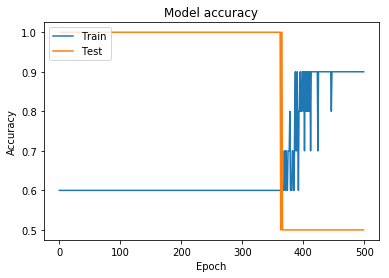

In [42]:
plt.plot(history1.history['acc'])
plt.plot(history1.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

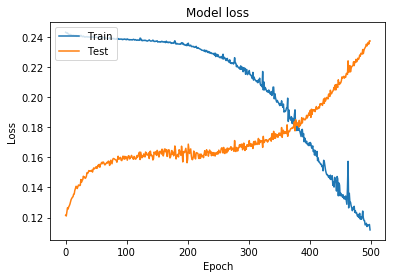

In [43]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
score1 = network1.evaluate(X_test, y_test, batch_size=1)

In [44]:
print("Loss: {} %".format(score1[0]*100.0))
print("Accuracy {} %".format(score1[1]*100.0))
print("Time: {} ms".format(end))

2/2 [==============================] - 0s 1ms/step
Loss: 11.186236515641212 %
Accuracy 100.0 %
Time: 6.760767936706543 ms


<b>Batch Size = Jumlah Data Latih</b>

##### Classifier Sendiri

In [45]:
start = time.time()

In [46]:
neural_network2 = Network([4, 3, 5, 10, 1])
neural_network2.fit(train_data, 500, len(X_train), 0.1, momentum=0.0001, validation_split=0.1)

Train on 10 samples, validate on 2 samples
Epoch 1/500 : 0.0015811920166015625 s - loss: 0.4 - acc: 0.6 - val_loss: 0.0 - val_acc: 1.0
Epoch 2/500 : 0.0013401508331298828 s - loss: 0.4 - acc: 0.6 - val_loss: 0.0 - val_acc: 1.0
Epoch 3/500 : 0.0013382434844970703 s - loss: 0.4 - acc: 0.6 - val_loss: 0.0 - val_acc: 1.0
Epoch 4/500 : 0.0011441707611083984 s - loss: 0.4 - acc: 0.6 - val_loss: 0.0 - val_acc: 1.0
Epoch 5/500 : 0.001310586929321289 s - loss: 0.4 - acc: 0.6 - val_loss: 0.0 - val_acc: 1.0
Epoch 6/500 : 0.0012900829315185547 s - loss: 0.4 - acc: 0.6 - val_loss: 0.0 - val_acc: 1.0
Epoch 7/500 : 0.0013155937194824219 s - loss: 0.4 - acc: 0.6 - val_loss: 0.0 - val_acc: 1.0
Epoch 8/500 : 0.0013492107391357422 s - loss: 0.4 - acc: 0.6 - val_loss: 0.0 - val_acc: 1.0
Epoch 9/500 : 0.0013518333435058594 s - loss: 0.4 - acc: 0.6 - val_loss: 0.0 - val_acc: 1.0
Epoch 10/500 : 0.0013277530670166016 s - loss: 0.4 - acc: 0.6 - val_loss: 0.0 - val_acc: 1.0
Epoch 11/500 : 0.0012962818145751953 

Epoch 100/500 : 0.001325368881225586 s - loss: 0.4 - acc: 0.6 - val_loss: 0.0 - val_acc: 1.0
Epoch 101/500 : 0.002583026885986328 s - loss: 0.4 - acc: 0.6 - val_loss: 0.0 - val_acc: 1.0
Epoch 102/500 : 0.001352071762084961 s - loss: 0.4 - acc: 0.6 - val_loss: 0.0 - val_acc: 1.0
Epoch 103/500 : 0.0012736320495605469 s - loss: 0.4 - acc: 0.6 - val_loss: 0.0 - val_acc: 1.0
Epoch 104/500 : 0.0013151168823242188 s - loss: 0.4 - acc: 0.6 - val_loss: 0.0 - val_acc: 1.0
Epoch 105/500 : 0.0013232231140136719 s - loss: 0.4 - acc: 0.6 - val_loss: 0.0 - val_acc: 1.0
Epoch 106/500 : 0.0015361309051513672 s - loss: 0.4 - acc: 0.6 - val_loss: 0.0 - val_acc: 1.0
Epoch 107/500 : 0.0013222694396972656 s - loss: 0.4 - acc: 0.6 - val_loss: 0.0 - val_acc: 1.0
Epoch 108/500 : 0.0013208389282226562 s - loss: 0.4 - acc: 0.6 - val_loss: 0.0 - val_acc: 1.0
Epoch 109/500 : 0.0013194084167480469 s - loss: 0.4 - acc: 0.6 - val_loss: 0.0 - val_acc: 1.0
Epoch 110/500 : 0.0013115406036376953 s - loss: 0.4 - acc: 0.6 

Epoch 202/500 : 0.0013151168823242188 s - loss: 0.4 - acc: 0.6 - val_loss: 0.0 - val_acc: 1.0
Epoch 203/500 : 0.0015902519226074219 s - loss: 0.4 - acc: 0.6 - val_loss: 0.0 - val_acc: 1.0
Epoch 204/500 : 0.0012841224670410156 s - loss: 0.4 - acc: 0.6 - val_loss: 0.0 - val_acc: 1.0
Epoch 205/500 : 0.0013082027435302734 s - loss: 0.4 - acc: 0.6 - val_loss: 0.0 - val_acc: 1.0
Epoch 206/500 : 0.0014040470123291016 s - loss: 0.4 - acc: 0.6 - val_loss: 0.0 - val_acc: 1.0
Epoch 207/500 : 0.0015344619750976562 s - loss: 0.4 - acc: 0.6 - val_loss: 0.0 - val_acc: 1.0
Epoch 208/500 : 0.0013751983642578125 s - loss: 0.4 - acc: 0.6 - val_loss: 0.0 - val_acc: 1.0
Epoch 209/500 : 0.0013823509216308594 s - loss: 0.4 - acc: 0.6 - val_loss: 0.0 - val_acc: 1.0
Epoch 210/500 : 0.001348733901977539 s - loss: 0.4 - acc: 0.6 - val_loss: 0.0 - val_acc: 1.0
Epoch 211/500 : 0.0013167858123779297 s - loss: 0.4 - acc: 0.6 - val_loss: 0.0 - val_acc: 1.0
Epoch 212/500 : 0.00140380859375 s - loss: 0.4 - acc: 0.6 - v

Epoch 313/500 : 0.0012698173522949219 s - loss: 0.4 - acc: 0.6 - val_loss: 0.0 - val_acc: 1.0
Epoch 314/500 : 0.0017828941345214844 s - loss: 0.4 - acc: 0.6 - val_loss: 0.0 - val_acc: 1.0
Epoch 315/500 : 0.0013284683227539062 s - loss: 0.4 - acc: 0.6 - val_loss: 0.0 - val_acc: 1.0
Epoch 316/500 : 0.0012726783752441406 s - loss: 0.4 - acc: 0.6 - val_loss: 0.0 - val_acc: 1.0
Epoch 317/500 : 0.00225067138671875 s - loss: 0.4 - acc: 0.6 - val_loss: 0.0 - val_acc: 1.0
Epoch 318/500 : 0.002255678176879883 s - loss: 0.4 - acc: 0.6 - val_loss: 0.0 - val_acc: 1.0
Epoch 319/500 : 0.002268075942993164 s - loss: 0.4 - acc: 0.6 - val_loss: 0.0 - val_acc: 1.0
Epoch 320/500 : 0.002265453338623047 s - loss: 0.4 - acc: 0.6 - val_loss: 0.0 - val_acc: 1.0
Epoch 321/500 : 0.0023031234741210938 s - loss: 0.4 - acc: 0.6 - val_loss: 0.0 - val_acc: 1.0
Epoch 322/500 : 0.002290487289428711 s - loss: 0.4 - acc: 0.6 - val_loss: 0.0 - val_acc: 1.0
Epoch 323/500 : 0.0021321773529052734 s - loss: 0.4 - acc: 0.6 - v

Epoch 421/500 : 0.002047300338745117 s - loss: 0.4 - acc: 0.6 - val_loss: 0.0 - val_acc: 1.0
Epoch 422/500 : 0.001477956771850586 s - loss: 0.4 - acc: 0.6 - val_loss: 0.0 - val_acc: 1.0
Epoch 423/500 : 0.0013055801391601562 s - loss: 0.4 - acc: 0.6 - val_loss: 0.0 - val_acc: 1.0
Epoch 424/500 : 0.0013201236724853516 s - loss: 0.4 - acc: 0.6 - val_loss: 0.0 - val_acc: 1.0
Epoch 425/500 : 0.0013206005096435547 s - loss: 0.4 - acc: 0.6 - val_loss: 0.0 - val_acc: 1.0
Epoch 426/500 : 0.001338958740234375 s - loss: 0.4 - acc: 0.6 - val_loss: 0.0 - val_acc: 1.0
Epoch 427/500 : 0.0013301372528076172 s - loss: 0.4 - acc: 0.6 - val_loss: 0.0 - val_acc: 1.0
Epoch 428/500 : 0.0013780593872070312 s - loss: 0.4 - acc: 0.6 - val_loss: 0.0 - val_acc: 1.0
Epoch 429/500 : 0.0013127326965332031 s - loss: 0.4 - acc: 0.6 - val_loss: 0.0 - val_acc: 1.0
Epoch 430/500 : 0.0013098716735839844 s - loss: 0.4 - acc: 0.6 - val_loss: 0.0 - val_acc: 1.0
Epoch 431/500 : 0.001367807388305664 s - loss: 0.4 - acc: 0.6 -

In [47]:
end = time.time() - start

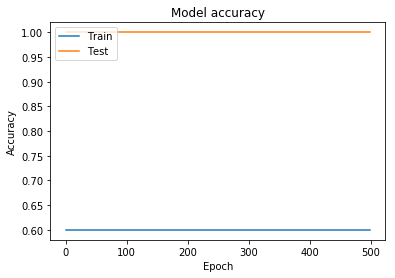

In [48]:
plt.plot(neural_network2.history['acc'])
plt.plot(neural_network2.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

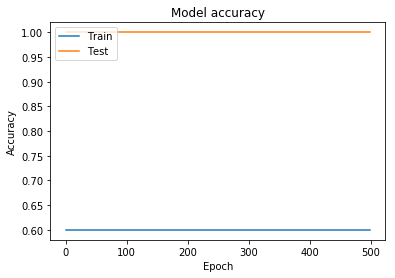

In [49]:
plt.plot(neural_network2.history['acc'])
plt.plot(neural_network2.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
accuracy2, loss2 = neural_network2.evaluate(test_data)

In [60]:
print("Loss: {} %".format(loss2*100.0))
print("Accuracy {} %".format(accuracy2*100.0))
print("Time: {} ms".format(end))

Loss: 50.0 %
Accuracy 50.0 %
Time: 2.0775177478790283 ms


##### Keras Model

Reinitialisasi model keras untuk eksperimen kedua.

In [51]:
network2 = Sequential([
    Dense(4, input_shape=(4,)),
    Dense(3, activation='sigmoid'),
    Dense(5, activation='sigmoid'),
    Dense(10, activation='sigmoid'),
    Dense(1, activation='sigmoid')
])

In [52]:
network2.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [53]:
network2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_11 (Dense)             (None, 3)                 15        
_________________________________________________________________
dense_12 (Dense)             (None, 5)                 20        
_________________________________________________________________
dense_13 (Dense)             (None, 10)                60        
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 11        
Total params: 126
Trainable params: 126
Non-trainable params: 0
_________________________________________________________________


In [54]:
start = time.time()

In [55]:
history2 = network2.fit(X_train, y_train, epochs=500, verbose=1, batch_size=len(X_train), validation_split=0.1)

Train on 10 samples, validate on 2 samples
Epoch 1/500
10/10 [==============================] - 0s 26ms/step - loss: 0.2438 - acc: 0.6000 - val_loss: 0.2137 - val_acc: 1.0000
Epoch 2/500
10/10 [==============================] - 0s 179us/step - loss: 0.2435 - acc: 0.6000 - val_loss: 0.2114 - val_acc: 1.0000
Epoch 3/500
10/10 [==============================] - 0s 186us/step - loss: 0.2432 - acc: 0.6000 - val_loss: 0.2092 - val_acc: 1.0000
Epoch 4/500
10/10 [==============================] - 0s 150us/step - loss: 0.2430 - acc: 0.6000 - val_loss: 0.2071 - val_acc: 1.0000
Epoch 5/500
10/10 [==============================] - 0s 147us/step - loss: 0.2427 - acc: 0.6000 - val_loss: 0.2051 - val_acc: 1.0000
Epoch 6/500
10/10 [==============================] - 0s 140us/step - loss: 0.2425 - acc: 0.6000 - val_loss: 0.2031 - val_acc: 1.0000
Epoch 7/500
10/10 [==============================] - 0s 147us/step - loss: 0.2422 - acc: 0.6000 - val_loss: 0.2012 - val_acc: 1.0000
Epoch 8/500
10/10 [========

Epoch 62/500
10/10 [==============================] - 0s 156us/step - loss: 0.2394 - acc: 0.6000 - val_loss: 0.1586 - val_acc: 1.0000
Epoch 63/500
10/10 [==============================] - 0s 168us/step - loss: 0.2394 - acc: 0.6000 - val_loss: 0.1588 - val_acc: 1.0000
Epoch 64/500
10/10 [==============================] - 0s 147us/step - loss: 0.2394 - acc: 0.6000 - val_loss: 0.1590 - val_acc: 1.0000
Epoch 65/500
10/10 [==============================] - 0s 184us/step - loss: 0.2394 - acc: 0.6000 - val_loss: 0.1591 - val_acc: 1.0000
Epoch 66/500
10/10 [==============================] - 0s 193us/step - loss: 0.2394 - acc: 0.6000 - val_loss: 0.1593 - val_acc: 1.0000
Epoch 67/500
10/10 [==============================] - 0s 171us/step - loss: 0.2394 - acc: 0.6000 - val_loss: 0.1595 - val_acc: 1.0000
Epoch 68/500
10/10 [==============================] - 0s 171us/step - loss: 0.2393 - acc: 0.6000 - val_loss: 0.1596 - val_acc: 1.0000
Epoch 69/500
10/10 [==============================] - 0s 165us

Epoch 123/500
10/10 [==============================] - 0s 174us/step - loss: 0.2389 - acc: 0.6000 - val_loss: 0.1611 - val_acc: 1.0000
Epoch 124/500
10/10 [==============================] - 0s 256us/step - loss: 0.2388 - acc: 0.6000 - val_loss: 0.1611 - val_acc: 1.0000
Epoch 125/500
10/10 [==============================] - 0s 159us/step - loss: 0.2388 - acc: 0.6000 - val_loss: 0.1611 - val_acc: 1.0000
Epoch 126/500
10/10 [==============================] - 0s 166us/step - loss: 0.2388 - acc: 0.6000 - val_loss: 0.1611 - val_acc: 1.0000
Epoch 127/500
10/10 [==============================] - 0s 185us/step - loss: 0.2388 - acc: 0.6000 - val_loss: 0.1611 - val_acc: 1.0000
Epoch 128/500
10/10 [==============================] - 0s 164us/step - loss: 0.2388 - acc: 0.6000 - val_loss: 0.1611 - val_acc: 1.0000
Epoch 129/500
10/10 [==============================] - 0s 190us/step - loss: 0.2388 - acc: 0.6000 - val_loss: 0.1611 - val_acc: 1.0000
Epoch 130/500
10/10 [==============================] - 

Epoch 184/500
10/10 [==============================] - 0s 166us/step - loss: 0.2380 - acc: 0.6000 - val_loss: 0.1617 - val_acc: 1.0000
Epoch 185/500
10/10 [==============================] - 0s 156us/step - loss: 0.2380 - acc: 0.6000 - val_loss: 0.1617 - val_acc: 1.0000
Epoch 186/500
10/10 [==============================] - 0s 143us/step - loss: 0.2380 - acc: 0.6000 - val_loss: 0.1617 - val_acc: 1.0000
Epoch 187/500
10/10 [==============================] - 0s 425us/step - loss: 0.2380 - acc: 0.6000 - val_loss: 0.1617 - val_acc: 1.0000
Epoch 188/500
10/10 [==============================] - 0s 234us/step - loss: 0.2379 - acc: 0.6000 - val_loss: 0.1618 - val_acc: 1.0000
Epoch 189/500
10/10 [==============================] - 0s 229us/step - loss: 0.2379 - acc: 0.6000 - val_loss: 0.1618 - val_acc: 1.0000
Epoch 190/500
10/10 [==============================] - 0s 195us/step - loss: 0.2379 - acc: 0.6000 - val_loss: 0.1618 - val_acc: 1.0000
Epoch 191/500
10/10 [==============================] - 

Epoch 245/500
10/10 [==============================] - 0s 192us/step - loss: 0.2366 - acc: 0.6000 - val_loss: 0.1624 - val_acc: 1.0000
Epoch 246/500
10/10 [==============================] - 0s 242us/step - loss: 0.2366 - acc: 0.6000 - val_loss: 0.1624 - val_acc: 1.0000
Epoch 247/500
10/10 [==============================] - 0s 338us/step - loss: 0.2366 - acc: 0.6000 - val_loss: 0.1624 - val_acc: 1.0000
Epoch 248/500
10/10 [==============================] - 0s 221us/step - loss: 0.2366 - acc: 0.6000 - val_loss: 0.1625 - val_acc: 1.0000
Epoch 249/500
10/10 [==============================] - 0s 186us/step - loss: 0.2365 - acc: 0.6000 - val_loss: 0.1625 - val_acc: 1.0000
Epoch 250/500
10/10 [==============================] - 0s 182us/step - loss: 0.2365 - acc: 0.6000 - val_loss: 0.1625 - val_acc: 1.0000
Epoch 251/500
10/10 [==============================] - 0s 168us/step - loss: 0.2365 - acc: 0.6000 - val_loss: 0.1625 - val_acc: 1.0000
Epoch 252/500
10/10 [==============================] - 

Epoch 306/500
10/10 [==============================] - 0s 170us/step - loss: 0.2344 - acc: 0.6000 - val_loss: 0.1633 - val_acc: 1.0000
Epoch 307/500
10/10 [==============================] - 0s 131us/step - loss: 0.2343 - acc: 0.6000 - val_loss: 0.1633 - val_acc: 1.0000
Epoch 308/500
10/10 [==============================] - 0s 139us/step - loss: 0.2343 - acc: 0.6000 - val_loss: 0.1633 - val_acc: 1.0000
Epoch 309/500
10/10 [==============================] - 0s 156us/step - loss: 0.2343 - acc: 0.6000 - val_loss: 0.1633 - val_acc: 1.0000
Epoch 310/500
10/10 [==============================] - 0s 164us/step - loss: 0.2342 - acc: 0.6000 - val_loss: 0.1633 - val_acc: 1.0000
Epoch 311/500
10/10 [==============================] - 0s 178us/step - loss: 0.2342 - acc: 0.6000 - val_loss: 0.1634 - val_acc: 1.0000
Epoch 312/500
10/10 [==============================] - 0s 225us/step - loss: 0.2341 - acc: 0.6000 - val_loss: 0.1634 - val_acc: 1.0000
Epoch 313/500
10/10 [==============================] - 

Epoch 367/500
10/10 [==============================] - 0s 258us/step - loss: 0.2307 - acc: 0.6000 - val_loss: 0.1646 - val_acc: 1.0000
Epoch 368/500
10/10 [==============================] - 0s 203us/step - loss: 0.2306 - acc: 0.6000 - val_loss: 0.1646 - val_acc: 1.0000
Epoch 369/500
10/10 [==============================] - 0s 174us/step - loss: 0.2306 - acc: 0.6000 - val_loss: 0.1646 - val_acc: 1.0000
Epoch 370/500
10/10 [==============================] - 0s 224us/step - loss: 0.2305 - acc: 0.6000 - val_loss: 0.1647 - val_acc: 1.0000
Epoch 371/500
10/10 [==============================] - 0s 184us/step - loss: 0.2304 - acc: 0.6000 - val_loss: 0.1647 - val_acc: 1.0000
Epoch 372/500
10/10 [==============================] - 0s 169us/step - loss: 0.2303 - acc: 0.6000 - val_loss: 0.1647 - val_acc: 1.0000
Epoch 373/500
10/10 [==============================] - 0s 184us/step - loss: 0.2303 - acc: 0.6000 - val_loss: 0.1647 - val_acc: 1.0000
Epoch 374/500
10/10 [==============================] - 

Epoch 428/500
10/10 [==============================] - 0s 156us/step - loss: 0.2253 - acc: 0.6000 - val_loss: 0.1670 - val_acc: 1.0000
Epoch 429/500
10/10 [==============================] - 0s 167us/step - loss: 0.2252 - acc: 0.6000 - val_loss: 0.1671 - val_acc: 1.0000
Epoch 430/500
10/10 [==============================] - 0s 190us/step - loss: 0.2251 - acc: 0.6000 - val_loss: 0.1671 - val_acc: 1.0000
Epoch 431/500
10/10 [==============================] - 0s 216us/step - loss: 0.2250 - acc: 0.6000 - val_loss: 0.1672 - val_acc: 1.0000
Epoch 432/500
10/10 [==============================] - 0s 167us/step - loss: 0.2248 - acc: 0.6000 - val_loss: 0.1673 - val_acc: 1.0000
Epoch 433/500
10/10 [==============================] - 0s 420us/step - loss: 0.2247 - acc: 0.6000 - val_loss: 0.1673 - val_acc: 1.0000
Epoch 434/500
10/10 [==============================] - 0s 204us/step - loss: 0.2246 - acc: 0.6000 - val_loss: 0.1674 - val_acc: 1.0000
Epoch 435/500
10/10 [==============================] - 

Epoch 489/500
10/10 [==============================] - 0s 306us/step - loss: 0.2184 - acc: 0.6000 - val_loss: 0.1716 - val_acc: 1.0000
Epoch 490/500
10/10 [==============================] - 0s 278us/step - loss: 0.2183 - acc: 0.6000 - val_loss: 0.1717 - val_acc: 1.0000
Epoch 491/500
10/10 [==============================] - 0s 283us/step - loss: 0.2182 - acc: 0.6000 - val_loss: 0.1718 - val_acc: 1.0000
Epoch 492/500
10/10 [==============================] - 0s 1ms/step - loss: 0.2181 - acc: 0.6000 - val_loss: 0.1719 - val_acc: 1.0000
Epoch 493/500
10/10 [==============================] - 0s 397us/step - loss: 0.2180 - acc: 0.6000 - val_loss: 0.1720 - val_acc: 1.0000
Epoch 494/500
10/10 [==============================] - 0s 961us/step - loss: 0.2178 - acc: 0.6000 - val_loss: 0.1721 - val_acc: 1.0000
Epoch 495/500
10/10 [==============================] - 0s 666us/step - loss: 0.2177 - acc: 0.6000 - val_loss: 0.1722 - val_acc: 1.0000
Epoch 496/500
10/10 [==============================] - 0s

In [56]:
end = time.time() - start

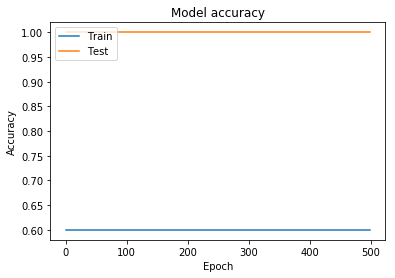

In [57]:
plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

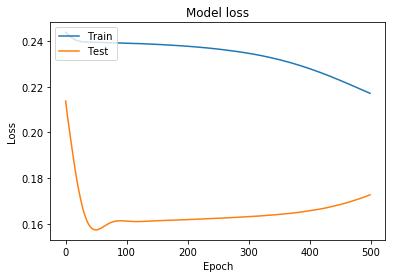

In [58]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
score2 = network2.evaluate(X_test, y_test, batch_size=len(X_train))

In [59]:
print("Loss: {} %".format(score2[0]*100.0))
print("Accuracy {} %".format(score2[1]*100.0))
print("Time: {} ms".format(end))

2/2 [==============================] - 0s 467us/step
Loss: 17.407499253749847 %
Accuracy 50.0 %
Time: 2.0775177478790283 ms


### Analisis Eksperimen

### Pembagian Kerja